# Einführung A2

Nachdem wir die ersten einfachen Berechnungen mit "Julia" in A1 kennen gelernt haben, arbeiten wir uns weiter durch die Wärmetechnischen Aufgaben. Parallel dazu bauen wir auch weitere Operationen mit der Programmiersprache ein.


## Array (Vector) Operationen und Schreibweisen
Vektoren werden in der Programmiering normalerweise als eindimensionale Arrays abgebildet (druchgehend allokierter Arbeitsspeicherbereich), in dem die Werte des Vektors "hintereinader", je nach Größe, im Arbeitsspeicher (Heap) oder direkt auf der CPU (Stack - CPU Register) gespeichert werden. 
``` julia
z.B. x = [0 1 2 3 4 5 6 7]
```
Wir verwenden diese hier z.B. häufig für die Darstellungen über Wertebereiche in Diagrammen.

Für bestimmte Operationen von Arrays/Vektoren mit normalen Werten (sog. Skalaren) und anderen Arrays können mit der Schreibweise `.Operator(+-*/)` elementweise Operationen für diese verwendet werden.

``` julia
a = 1
x = [1 2 3]
y = [4 5 6]

x + y # Elementweise Addition (x .+ y identisch)

a .+ x # Addiere a auf jedes Element von x.  a + x geht hier nicht da scalar + vektor addition nicht definiert

x .* y # Elementweise Multiplikation von Vektoren. x * y

a * y # Elementweise Multiplikation von Vektor mit einem Skalar (a .* y identisch)

# x * y # Nicht definiert (FEHLERMELDUNG) -> wäre normalerweise ein Vektorprodukt -> brauchen wir im folgenden sowieso niemals

```

**Achtung für elementweise Operationen zwischen Arrays (Vektoren) müssen diese identische Dimensionen haben.**

Sie können in folgender Zelle einfach mal testen, was verschieden Rechenoperationen (mit und ohne `.`) zwischen Array(s) und/oder Skalaren ergeben: 

In [2]:
a = 1
x = [1 2 3]
y = [4 5 6]


1×3 Array{Int64,2}:
 4  5  6

In [3]:
using Plots
using LaTeXStrings
using StatsPlots

# A-2

_Zum kontinuierlichen Glühen von Stahlplatten wird ein Rollendurchlaufofen eingesetzt. Die Guttemperatur am Ofeneingang ist $T_i$ = 300 K. Die durch den Behandlungsprozess definierte Guttemperatur am Ofenaustritt ist $T_a$ = 1250 K. Die Außenabmessungen des Ofens sind entsprechend $H_O$ x $B_O$ x $L_O$ = 2 m x 2,4 m x 25 m. Der Ofen wurde in einer großen Produktionshalle auf einem Betonfundament mit einer Dicke $s_B$ = 0,5 m eingerichtet (Wärmeleitfähigkeit des Betons beträgt $\lambda$ 1,4 W/(mK)). Die Temperatur der Hallenwand ist $T_{S,2}$ = 300 K. Die Unterseite des Betonfundaments hat eine Temperatur $T_B$ = 300 K. Die untere Ofenwand (an der Kontaktstelle mit dem Betonfundament) hat eine Temperatur $T_{S,1}$ = 350 K. Die obere Ofenwand als auch die seitlichen Ofenwände haben die gleiche Temperatur $T_{S,1}$ = 350 K (Umgebungsluft mit $T_U$ = 300 K). Der Wärmeübergangskoeffizient $\alpha$ für die freie Konvektion zwischen der Ofenwand und der Umgebungsluft beträgt 10 W/(m²K). Der Emissionskoeffizient $\varepsilon$ der Ofenwände ist 0,8. 
Wie groß ist der elektrische Energiebedarf des Ofens $P_{el}$ bei einem Ofendurchsatz von 4,5504 t/h (die spezifische Wärmekapazität des Stahls kann als konstant angenommen werden und beträgt, $c_{St}$ = 578 J/(kgK)) ?_

<div style="text-align:center"><img src="./img/Abbildung_Aufgabe2.png" width=600Px></div>

Lösungsansatz: 
- Energiebilanz aufstellen
- die einzelnen Wärmeströme berechnen
- Aus der Energiebilanz auf die benötigte Leistung schließen 

$$\dot{E}_{in} + \dot{E_g} - \dot{E}_{out} = \frac{d\dot{E}_{st}}{dt}$$

1. Zuweisen der benötigten Variablen:

In [4]:
# Variablen werden in SI-Einheiten definiert

#Temperaturen
T_i = 300                 # Guttemperatur am Eintritt
T_a = 1250                # Guttemperatur am Austritt
T_S1 = 350                # Temperatur der Ofenwand
T_B = 300                 # Temperatur des Betonfundaments
T_S2 = 300                # Temperatur der Hallenwand
T_U = 300                 # Temperatur der Umgebung

#Geometrische Maße
H_O = 2                   # Höhe des Ofens
B_O = 2.4                 # Breite  des Ofens
L_O = 25                  # Länge des Ofens
s_B = 0.5                 # Dicke des Fundaments

#Konstanten und Stoffdaten
λ = 1.4                   # Wärmeleitfähigkeit
α = 10                    # Wärmeübergangskoeffizient
ε = 0.8                   # Emissionskoeffizient
c_st = 578                # Wärmekapazität des Stahls
σ = 5.67*10^-8            # Stefan-Boltzmann-Konstante

#Prozessdaten
m_st = 1.264              # Massenstrom in kg/s

1.264

Die Energiebilanz kann wie folgt vereinfacht werden:

$$\dot{E}_{in} + \dot{E_g} - \dot{E}_{out} = \frac{d\dot{E}_{st}}{dt}$$

keine Wärmegeneration im Ofen 

$$\dot{E_g} = 0$$

stationärer Prozess (da kontinuierlich)

$$\frac{\dot{dE_{st}}}{dt} = 0 $$

Es verbleibt daher 

$$\dot{E}_{in} - \dot{E}_{out} = 0$$

Die eintretenden Wärmeströme sind die innere Energie des Stahls mit der Eintrittstemperatur und die elektrische Leistung

$$\dot{E}_{in} = \dot{E}_{Stahl,ein} + P_{el} $$

Die austretenden Wärmeströme sind die innere Energie des Stahls mit der Austrittstemperatur sowie die Wärmeverluste durch Konvektion, Wärmeleitung und Strahlung

$$\dot{E}_{aus} = \dot{E}_{Stahl,aus} + \dot{Q}_{conv} + \dot{Q}_{cond} + \dot{Q}_{Rad}$$

Die Berechnung der einzelnen Wärmeströme folgt:

In [5]:
# Enthalpiestrom des Stahl am Eintritt bezogen auf 0°C:
E_Stahlein = m_st * c_st * (T_i - 273.15)   

# Enthalpiestrom des Stahl am Austritt bezogen auf 0°C:
E_Stahlaus = m_st * c_st * (T_a - 273.15)    

# Seitenflächen, Stirnflächen und Oberseite des Ofens:
A_O = 2 * H_O * L_O + 2 * B_O * H_O + L_O * B_O      

# Konvektion über Seitenflächen, Stirnflächen und Oberseite des Ofens:
Q_conv = α * A_O * (T_S1 - T_U)              

# Wärmeleitung über den Boden:
Q_cond = -λ * L_O * B_O * (T_B - T_S1)/s_B 

# Strahlung an die Hallenwand:
Q_rad = ε * σ * A_O * (T_S1^4 - T_S2^4);       

Eingesetzt in die Energiebilanz erhalten wir

In [6]:
# Gesamter elektrischer Energiebedarf in W:
P_el = Q_conv + Q_cond + Q_rad + (E_Stahlaus-E_Stahlein)  

840392.5680000001

## ZA-2.1: 

_Berechnen Sie den spezifischen elektrischen Energiebedarf, um ein kg Stahl auf die Zieltemperatur zu erwärmen (in J/kg) . Berechnen Sie darüber hinaus den Anteil der Energie, der sich in den Verlusttermen wiederspiegelt._

Kopieren und komplettieren (an den markierten Stellen) Sie hierfür den folgenden Codeauschnitt in die folgende Zelle: 

``` Julia
Q_spezifisch = 
x_Verlust = 
```
spezifischer elektrischen Energiebedarf

In [7]:
# Q_spezifisch - Gleichung hier eintragen


Prozentualer Anteil der Wärmeverluste am Energieeinsatz

In [8]:
# x_Verlust - Gleichung hier eintragen


Im Folgenden werden die Wärmeverluste in Abhängigkeit eines variablen Massenstroms dargestellt. 

_(Die hier verwendete Syntax ist erstmal nicht wichtig. Wer sich informieren will wie die "plot" Funktion funktioniert, findet unter https://docs.juliaplots.org/latest/ weitere Informationen)_

┌ Info: Saved animation to 
│   fn = /home/jovyan/iob-tp1/anim_massflow_balance.gif
└ @ Plots /opt/julia/packages/Plots/lmp2A/src/animation.jl:104


Plots.AnimatedGif("/home/jovyan/iob-tp1/anim_massflow_balance.gif")
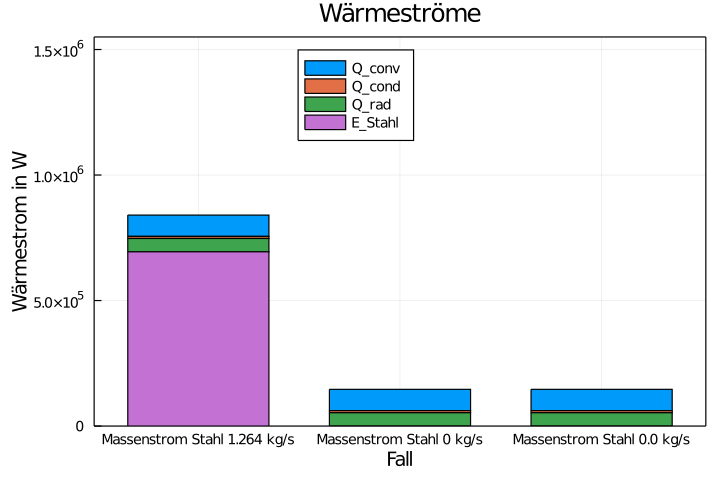

In [9]:
anim = @animate for m_factor = 0:0.1:2
    m_st_var = m_st * m_factor
    Delta_E =  m_st_var * c_st * (T_a - T_i) 
    names = ["Massenstrom Stahl " * string(m_st) * " kg/s",
             "Massenstrom Stahl 0 kg/s", 
             "Massenstrom Stahl " * string(m_factor) *  " kg/s"]
    
    qmat = [Q_conv Q_cond Q_rad (E_Stahlaus - E_Stahlein);
            Q_conv Q_cond Q_rad 0;
            Q_conv Q_cond Q_rad Delta_E]
    
    groupedbar(names, qmat, bar_position = :stack, bar_width=0.7, dpi = 120,
               title = "Wärmeströme", framestyle = :box, legend = :top, 
               ylim=(0,1.55E6), label = ["Q_conv" "Q_cond" "Q_rad" "E_Stahl"], 
               ylabel="Wärmestrom in W", xlabel="Fall" )
end

gif(anim, "anim_massflow_balance.gif", fps = 2)

Anhand des Schiebers können Sie feststellen, dass die Verluste in Relation zu dem gesamten Wärmestrom zunehmen, wenn der Massenstrom des Stahls abnimmt. Dies ist ein sogenanntes Teillastverhalten. Stellen Sie abschließend den prozentualer Anteil der Wärmeverluste am Energieeinsatz in Abhängigkeit des Massenstroms grafisch dar. Berechnen Sie hierzu `x_Verlust` in Abhängigkeit von `m_st_var2`.

In [10]:
m_factor2 = collect(0:0.1:2)
m_st_var2 = m_st .* m_factor2;

_Beachten Sie die am Anfang der Aufgabe vorgestellten Syntax für elementweise Operationen_

In [11]:
# x_Verlust - Lösung eintragen


Stellen Sie ihre Ergenis durch Einkommentieren der folgenden Zeile dar.

In [12]:
#plt=plot(m_st_var2, x_Verlust .* 100, xlabel="Massenstrom in kg/s", ylabel="Anteil der Wärmeverluste in %", label="x_Verlust", framestyle = :box) 